In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

# Load the data
data = pd.read_csv("D:\\project-Geo\\data\\Database_zero.csv")

target = 'obesity_cr'



Social Variables

In [21]:
sociodemographic_variables = [
    'minorpct', 'femalepct', 'rpl_theme1', 'rpl_theme2', 'rpl_theme3', 'rpl_theme4', 
     'mediahhinc', 'TractSNAP_per_capita','TractHUNV_per_capita'
]

Highly Correlated Variable Pairs:
mediahhinc  rpl_theme1    0.8169
dtype: float64


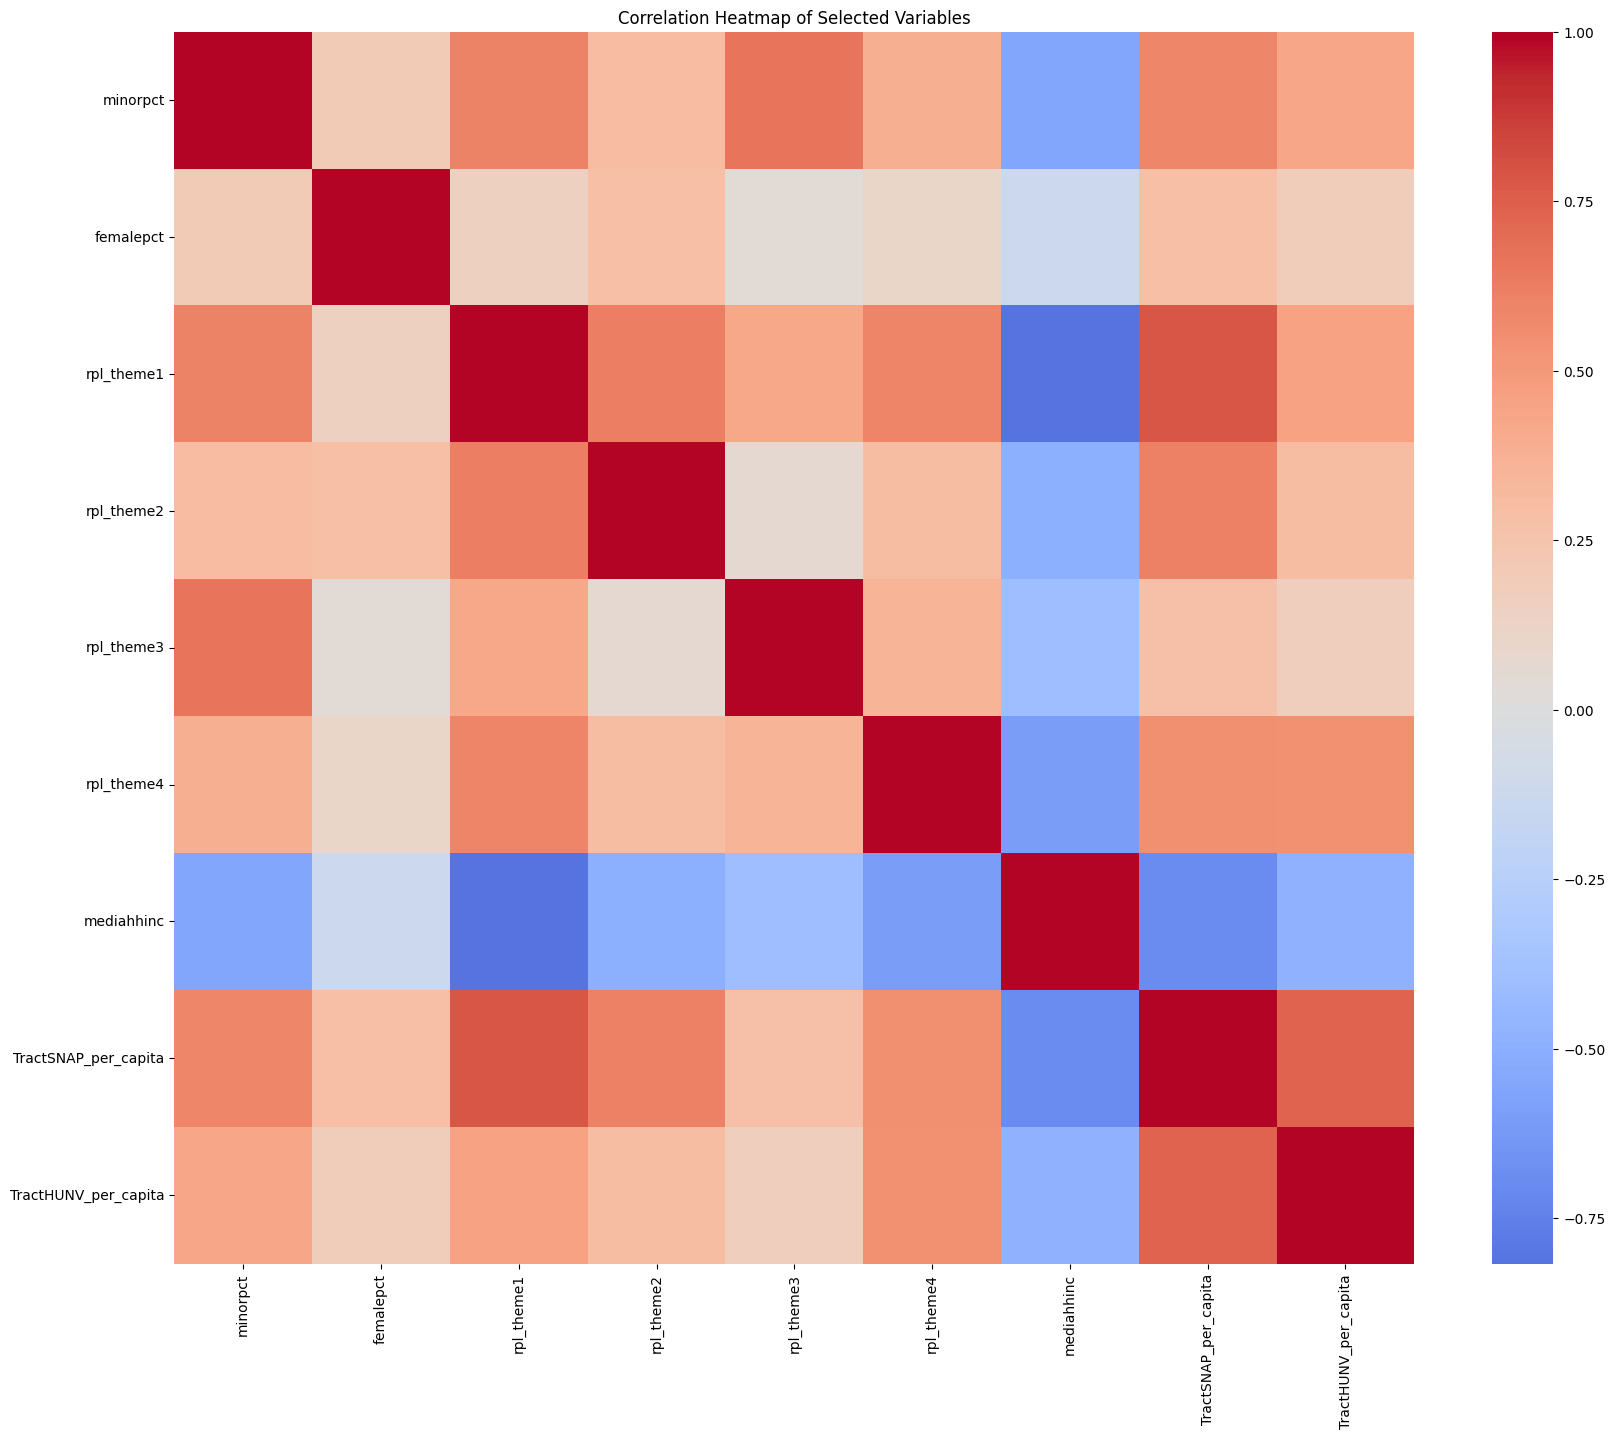

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Subset the data to include only the selected variables
data_subset = data[sociodemographic_variables]

# Ensure that column names are unique
data_subset.columns = pd.Series(data_subset.columns).apply(lambda x: x + "_" + str(pd.Series(data_subset.columns).tolist().count(x)) if pd.Series(data_subset.columns).tolist().count(x) > 1 else x)

# Compute the correlation matrix
correlation_matrix = data_subset.corr()

# Function to get highly correlated pairs
def get_highly_correlated_pairs(corr_matrix, threshold=0.8):
    corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
    high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)].drop_duplicates()
    return high_corr

# Get the highly correlated pairs
high_corr_pairs = get_highly_correlated_pairs(correlation_matrix)

# Adjust Pandas settings to display all rows
pd.set_option('display.max_rows', None)

# Display the highly correlated pairs
print("Highly Correlated Variable Pairs:")
print(high_corr_pairs)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()



Running TPOT for Sociodemographic variables
                                                                             
Generation 1 - Current best internal CV score: 0.8389591736555261
                                                                              
Generation 2 - Current best internal CV score: 0.8389591736555261
                                                                              
Generation 3 - Current best internal CV score: 0.8449447380264885
                                                                              
Generation 4 - Current best internal CV score: 0.8449447380264885
                                                                              
Generation 5 - Current best internal CV score: 0.8519754833457769
                                                                              
Best pipeline: XGBRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=0.1, max_depth=5, min_

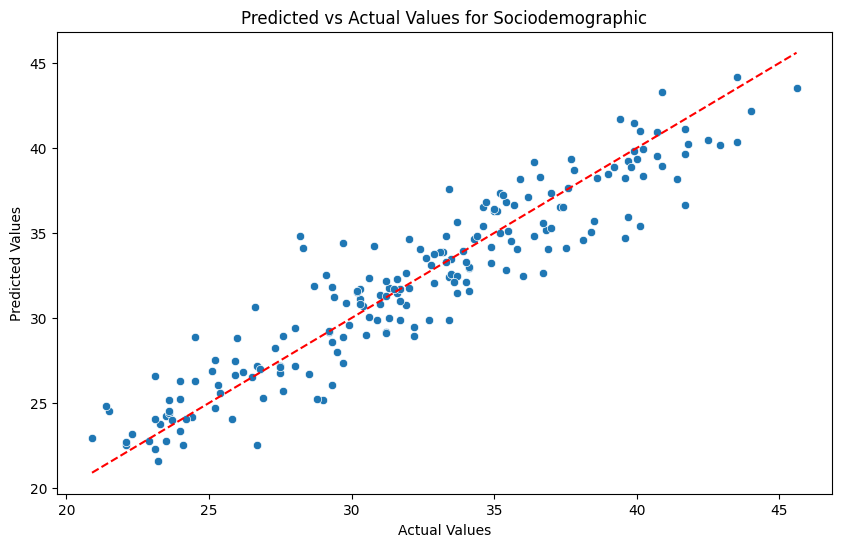

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to split data
def split_data(data, vars, target):
    X = data[vars]
    y = data[target]
    return train_test_split(X, y, test_size=0.2, random_state=0)

# Ensure data is numeric
def ensure_numeric(X):
    for col in X.columns:
        if X[col].dtype == 'bool':
            X[col] = X[col].astype(int)
        else:
            X[col] = pd.to_numeric(X[col], errors='coerce')
    return X

# Splitting the data for social category
X_train_social, X_test_social, y_train_social, y_test_social = split_data(data, sociodemographic_variables, target)
X_train_social = ensure_numeric(X_train_social)
X_test_social = ensure_numeric(X_test_social)

# Function to run TPOT and evaluate
def run_tpot(X_train, y_train, X_test, y_test, category, generations=5, population_size=50,scoring='r2'):
    tpot = TPOTRegressor(generations=generations, population_size=population_size, verbosity=2, n_jobs=-1, random_state=0,scoring=scoring)
    tpot.fit(X_train, y_train)
    y_pred_train = tpot.predict(X_train)
    y_pred_test = tpot.predict(X_test)
    
    # Evaluation metrics on test set
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f'\nTest Set Performance for {category} Variables:')
    print(f'MAE: {mae_test}')
    print(f'MSE: {mse_test}')
    print(f'RMSE: {rmse_test}')
    print(f'R^2: {r2_test}')
    
    specific_file_path = f"D:\\project-Geo\\tpot_best_pipeline_{category}.py"
    tpot.export(specific_file_path)
    
    return tpot, y_pred_test

# Function to plot predicted vs actual values
def plot_predicted_vs_actual(y_test, y_pred, category):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(f'Predicted vs Actual Values for {category}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Run TPOT, evaluate on test set, and plot results for social category
category = "Sociodemographic"
print(f"\nRunning TPOT for {category} variables")
tpot_model_social, y_pred_test_social = run_tpot(X_train_social, y_train_social, X_test_social, y_test_social, category)

print(f"\nPlotting Predicted vs Actual for {category} variables")
plot_predicted_vs_actual(y_test_social, y_pred_test_social, category)


Human Behavior Variables


In [24]:
human_behavior_variables = [
    'BINGE_CrudePrev', 'SLEEP_CrudePrev', 'CHOLSCREEN_CrudePrev', 'DEPRESSION_CrudePrev',
    'COREM_CrudePrev', 'LPA_CrudePrev', 'workers_public_transport_45_min', 
    'workers_walking_15_min_to_work', 'Number of drivers_per_capita'
]

Highly Correlated Variable Pairs:
LPA_CrudePrev    COREM_CrudePrev    0.878007
COREM_CrudePrev  SLEEP_CrudePrev    0.821626
LPA_CrudePrev    SLEEP_CrudePrev    0.803144
dtype: float64


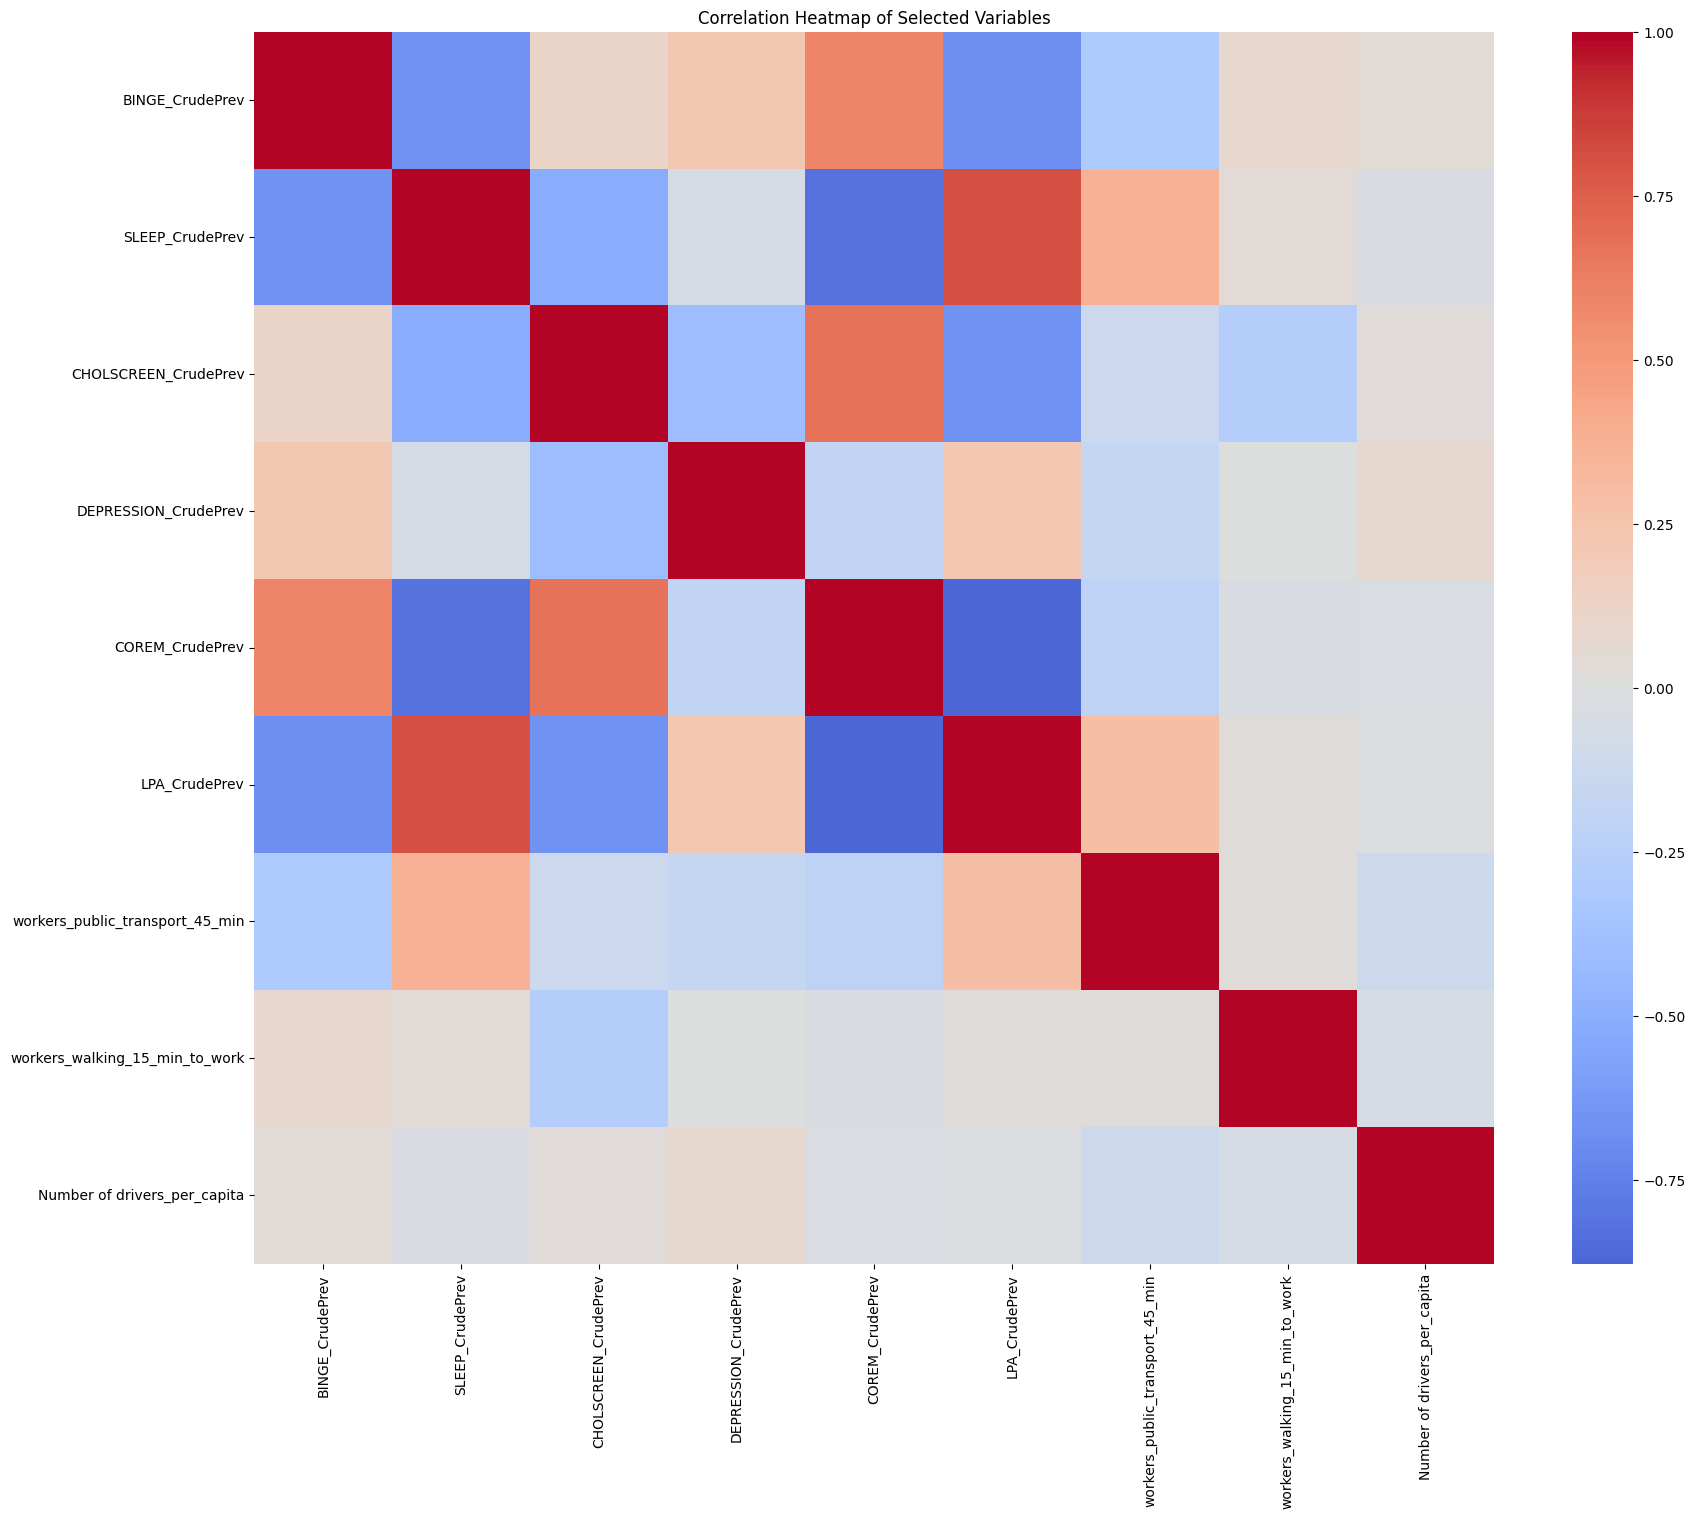

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Subset the data to include only the selected variables
data_subset = data[human_behavior_variables]

# Ensure that column names are unique
data_subset.columns = pd.Series(data_subset.columns).apply(lambda x: x + "_" + str(pd.Series(data_subset.columns).tolist().count(x)) if pd.Series(data_subset.columns).tolist().count(x) > 1 else x)

# Compute the correlation matrix
correlation_matrix = data_subset.corr()

# Function to get highly correlated pairs
def get_highly_correlated_pairs(corr_matrix, threshold=0.8):
    corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
    high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)].drop_duplicates()
    return high_corr

# Get the highly correlated pairs
high_corr_pairs = get_highly_correlated_pairs(correlation_matrix)

# Adjust Pandas settings to display all rows
pd.set_option('display.max_rows', None)

# Display the highly correlated pairs
print("Highly Correlated Variable Pairs:")
print(high_corr_pairs)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()



Running TPOT for behavior variables
                                                                             
Generation 1 - Current best internal CV score: 0.9323066492428564
                                                                              
Generation 2 - Current best internal CV score: 0.9323066492428564
                                                                              
Generation 3 - Current best internal CV score: 0.9323987558748963
                                                                              
Generation 4 - Current best internal CV score: 0.9334235836038796
                                                                              
Generation 5 - Current best internal CV score: 0.9383536362619693
                                                                              
Best pipeline: GradientBoostingRegressor(RidgeCV(input_matrix), alpha=0.95, learning_rate=0.1, loss=huber, max_depth=10, max_features=0.8500000000000001, min_sa

C:\Users\pengfei lou\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\pengfei lou\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(



Test Set Performance for behavior Variables:
MAE: 0.9146592452537002
MSE: 1.6233989921618748
RMSE: 1.2741267567090313
R^2: 0.949298676547858

Plotting Predicted vs Actual for behavior variables


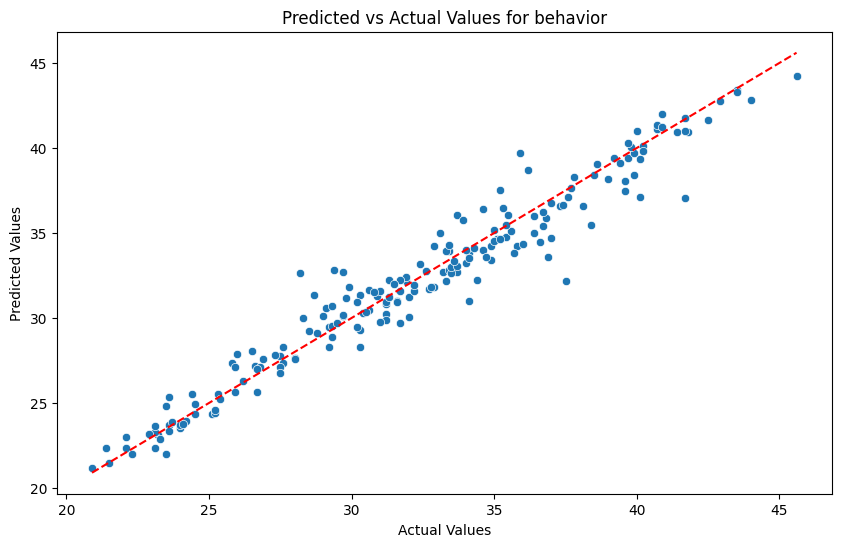

In [26]:
# Splitting the data for human behavior category
X_train_behavior, X_test_behavior, y_train_behavior, y_test_behavior = split_data(data, human_behavior_variables, target)
X_train_behavior = ensure_numeric(X_train_behavior)
X_test_behavior = ensure_numeric(X_test_behavior)

# Run TPOT, evaluate on test set, and plot results for behavior category
category = "behavior"
print(f"\nRunning TPOT for {category} variables")
tpot_model_behavior, y_pred_test_behavior = run_tpot(X_train_behavior, y_train_behavior, X_test_behavior, y_test_behavior, category)

print(f"\nPlotting Predicted vs Actual for {category} variables")
plot_predicted_vs_actual(y_test_behavior, y_pred_test_behavior, category)


Environment Variables

In [27]:

environment_variables = [
   'environmental_justice_index', 'distance_to_park_within_1_mile', 'grocery_per_capita',
    'convenienc_per_capita', 'fvmarket_per_capita', 'warehousec_per_capita', 
    'fastfood_per_capita', 'INTDENSITY', 'Number of Marta Stops_per_capita', 'med_dist'
]

Highly Correlated Variable Pairs:
Series([], dtype: float64)


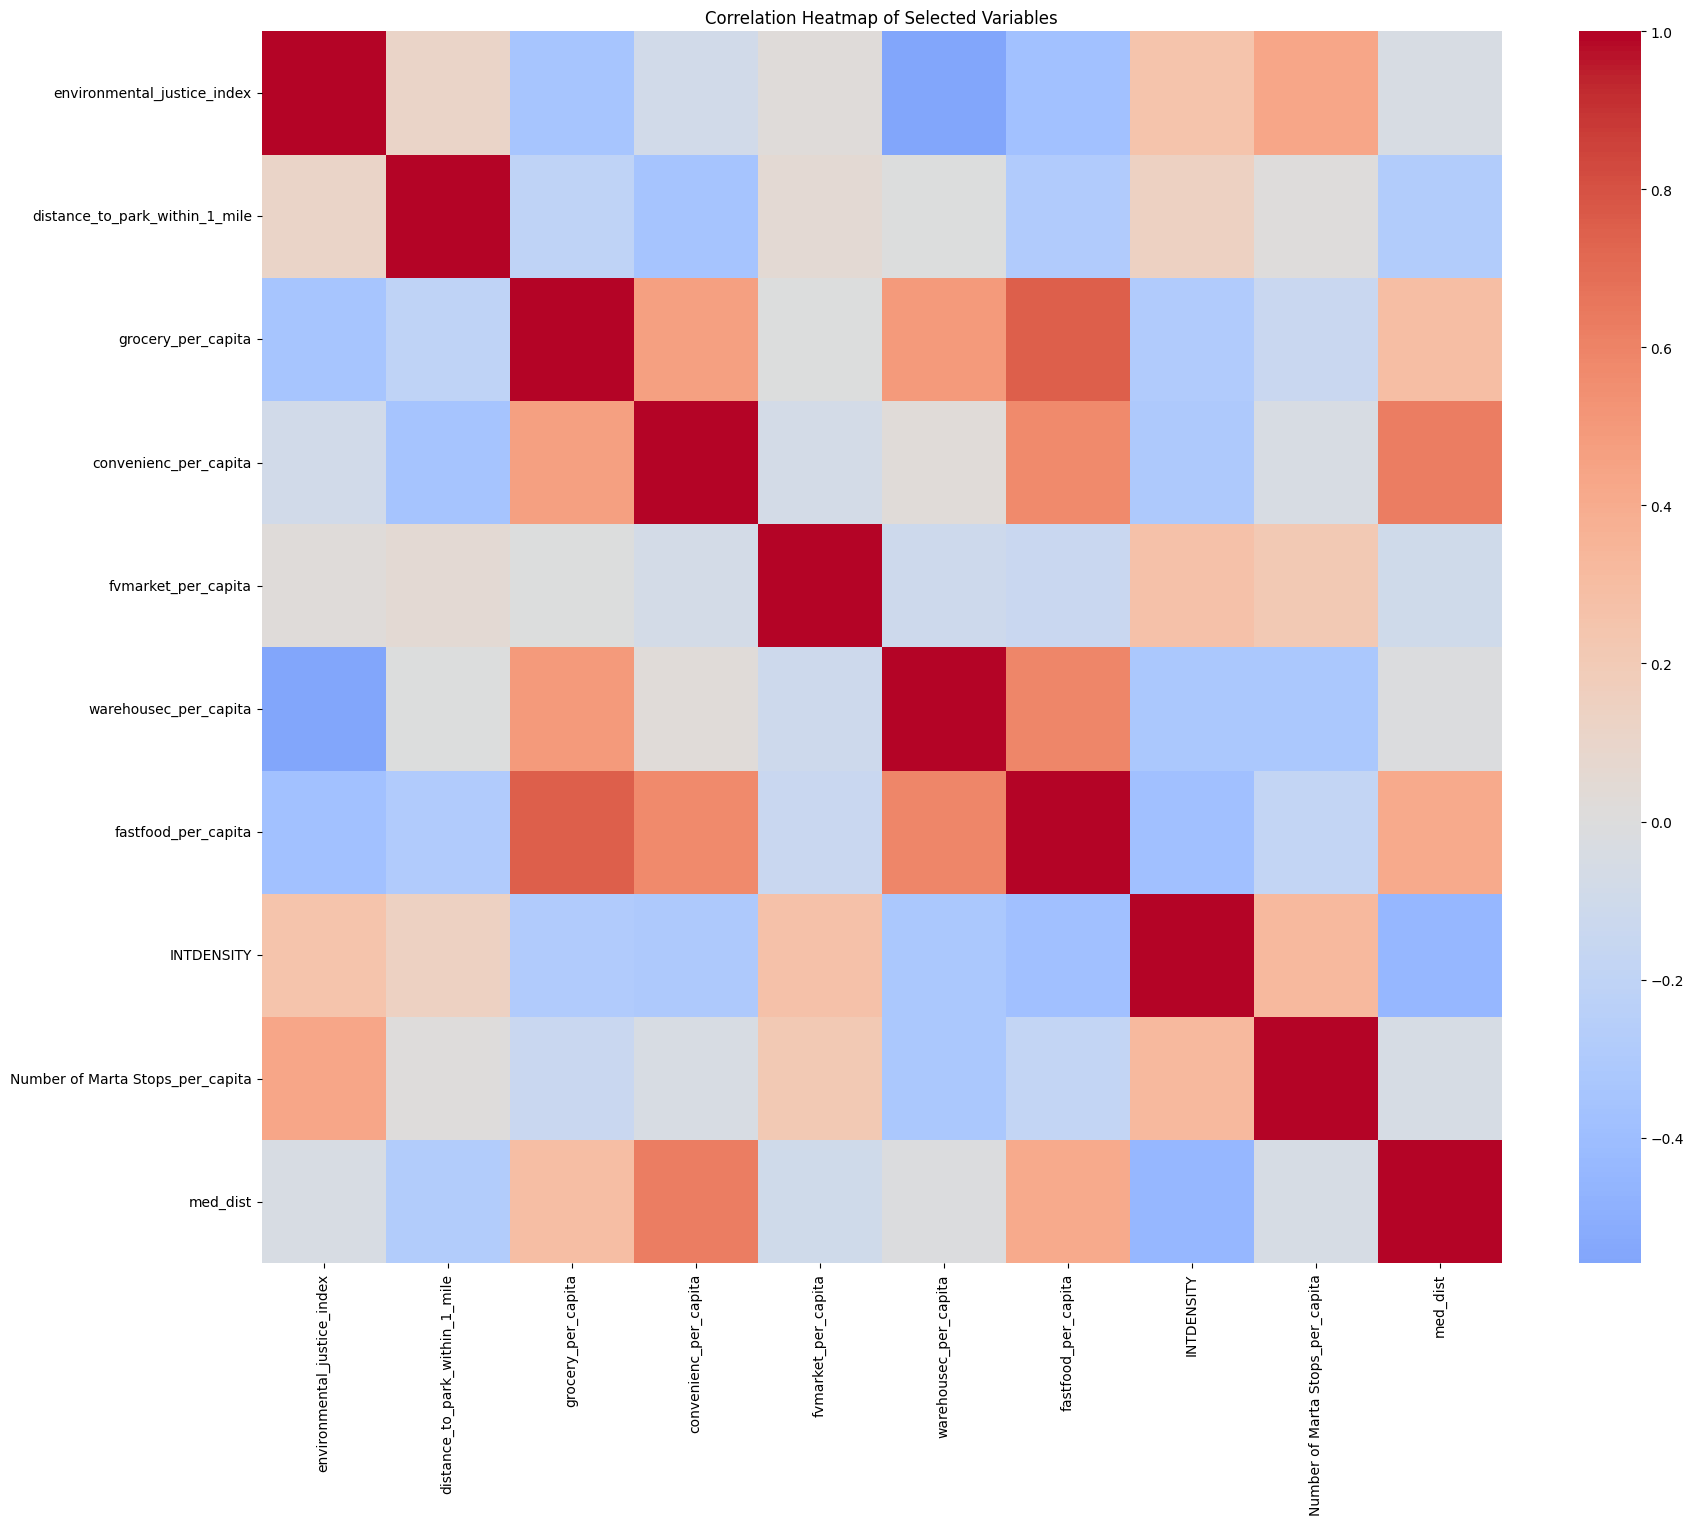

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Subset the data to include only the selected variables
data_subset = data[environment_variables]

# Ensure that column names are unique
data_subset.columns = pd.Series(data_subset.columns).apply(lambda x: x + "_" + str(pd.Series(data_subset.columns).tolist().count(x)) if pd.Series(data_subset.columns).tolist().count(x) > 1 else x)

# Compute the correlation matrix
correlation_matrix = data_subset.corr()

# Function to get highly correlated pairs
def get_highly_correlated_pairs(corr_matrix, threshold=0.8):
    corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
    high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)].drop_duplicates()
    return high_corr

# Get the highly correlated pairs
high_corr_pairs = get_highly_correlated_pairs(correlation_matrix)

# Adjust Pandas settings to display all rows
pd.set_option('display.max_rows', None)

# Display the highly correlated pairs
print("Highly Correlated Variable Pairs:")
print(high_corr_pairs)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()



Running TPOT for environmental variables
                                                                             
Generation 1 - Current best internal CV score: 0.677700893691682
                                                                              
Generation 2 - Current best internal CV score: 0.6818436786083399
                                                                              
Generation 3 - Current best internal CV score: 0.6818436786083399
                                                                              
Generation 4 - Current best internal CV score: 0.685182755123962
                                                                              
Generation 5 - Current best internal CV score: 0.6948162138255556
                                                                              
Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsamp

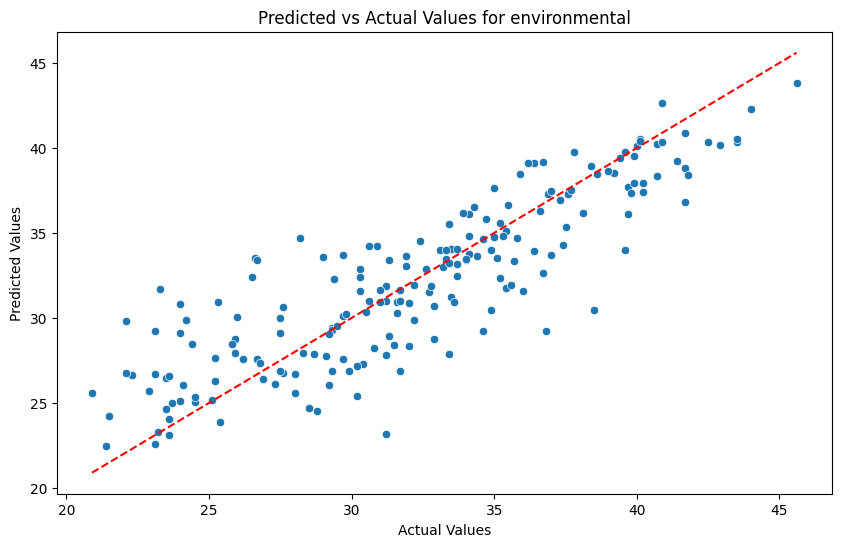

In [29]:
# Splitting the data for built environment category
X_train_built, X_test_built, y_train_built, y_test_built = split_data(data, environment_variables, target)
X_train_built = ensure_numeric(X_train_built)
X_test_built = ensure_numeric(X_test_built)

# Run TPOT, evaluate on test set, and plot results for built category
category = "environmental"
print(f"\nRunning TPOT for {category} variables")
tpot_model_built, y_pred_test_built = run_tpot(X_train_built, y_train_built, X_test_built, y_test_built, category)

print(f"\nPlotting Predicted vs Actual for {category} variables")
plot_predicted_vs_actual(y_test_built, y_pred_test_built, category)


All Variables

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier




sociodemographic_variables = [
    'minorpct', 'femalepct', 'rpl_theme1', 'rpl_theme2', 'rpl_theme3', 'rpl_theme4', 
     'mediahhinc', 'TractSNAP_per_capita','TractHUNV_per_capita'#'rpl_themes',
]

human_behavior_variables = [
    'BINGE_CrudePrev', 'SLEEP_CrudePrev', 'CHOLSCREEN_CrudePrev', 'DEPRESSION_CrudePrev',
    'COREM_CrudePrev', 'LPA_CrudePrev', 'workers_public_transport_45_min', 
    'workers_walking_15_min_to_work', 'Number of drivers_per_capita'
]

environment_variables = [
    'environmental_justice_index', 'distance_to_park_within_1_mile', 'grocery_per_capita',
    'convenienc_per_capita', 'fvmarket_per_capita', 'warehousec_per_capita', 
    'fastfood_per_capita', 'INTDENSITY', 'Number of Marta Stops_per_capita', 'med_dist'
]

# Load your data
data = pd.read_csv("D:\\project-Geo\\data\\Database_zero.csv")
# Ensure the target variable is also loaded
target = 'obesity_cr'



In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure data is numeric
def ensure_numeric(X):
    for col in X.columns:
        if X[col].dtype == 'bool':
            X[col] = X[col].astype(int)
        else:
            X[col] = pd.to_numeric(X[col], errors='coerce')
    return X


# Combine all variables into a single list
all_variables = (
    sociodemographic_variables +
    human_behavior_variables +
    environment_variables 
)

# Verify if the target variable exists in the data
target_variable = 'obesity_cr'
if target_variable not in data.columns:
    raise ValueError(f"Target variable '{target_variable}' is not present in the dataset")

# Function to calculate and filter VIF
def calculate_vif(data, variables):
    X = data[variables].copy()
    X = ensure_numeric(X)
    X = sm.add_constant(X)
    
    # Handle missing values by filling them with the median
    X.fillna(X.median(), inplace=True)
    
    # Replace infinite values with large finite numbers
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(X.median(), inplace=True)
    
    # Calculate VIF
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Filter out variables with VIF greater than 20
    filtered_vif_data = vif_data[vif_data['VIF'] > 20]
    
    # Remove high VIF variables
    filtered_vars = filtered_vif_data['Variable'].tolist()
    if 'const' in filtered_vars:
        filtered_vars.remove('const')
    
    return filtered_vif_data, filtered_vars

# Calculate VIF for all combined variables
print("\nCalculating VIF for all combined variables")
filtered_vif_data, filtered_vars = calculate_vif(data, all_variables)
print("Variables with high VIF:")
print(filtered_vif_data)

# Uncomment the following lines to drop variables with high VIF and check remaining variables
# data = data.drop(columns=filtered_vars)
# print("Remaining variables after removing high VIF:")
# remaining_vars = [var for var in all_variables if var not in filtered_vars]
# print(remaining_vars)



Calculating VIF for all combined variables
Variables with high VIF:
  Variable          VIF
0    const  6139.822813


Highly Correlated Variable Pairs:
rpl_theme1       LPA_CrudePrev           0.884419
LPA_CrudePrev    COREM_CrudePrev         0.878007
rpl_theme1       COREM_CrudePrev         0.839596
SLEEP_CrudePrev  COREM_CrudePrev         0.821626
rpl_theme1       mediahhinc              0.816900
LPA_CrudePrev    TractSNAP_per_capita    0.805971
SLEEP_CrudePrev  LPA_CrudePrev           0.803144
mediahhinc       LPA_CrudePrev           0.801867
dtype: float64


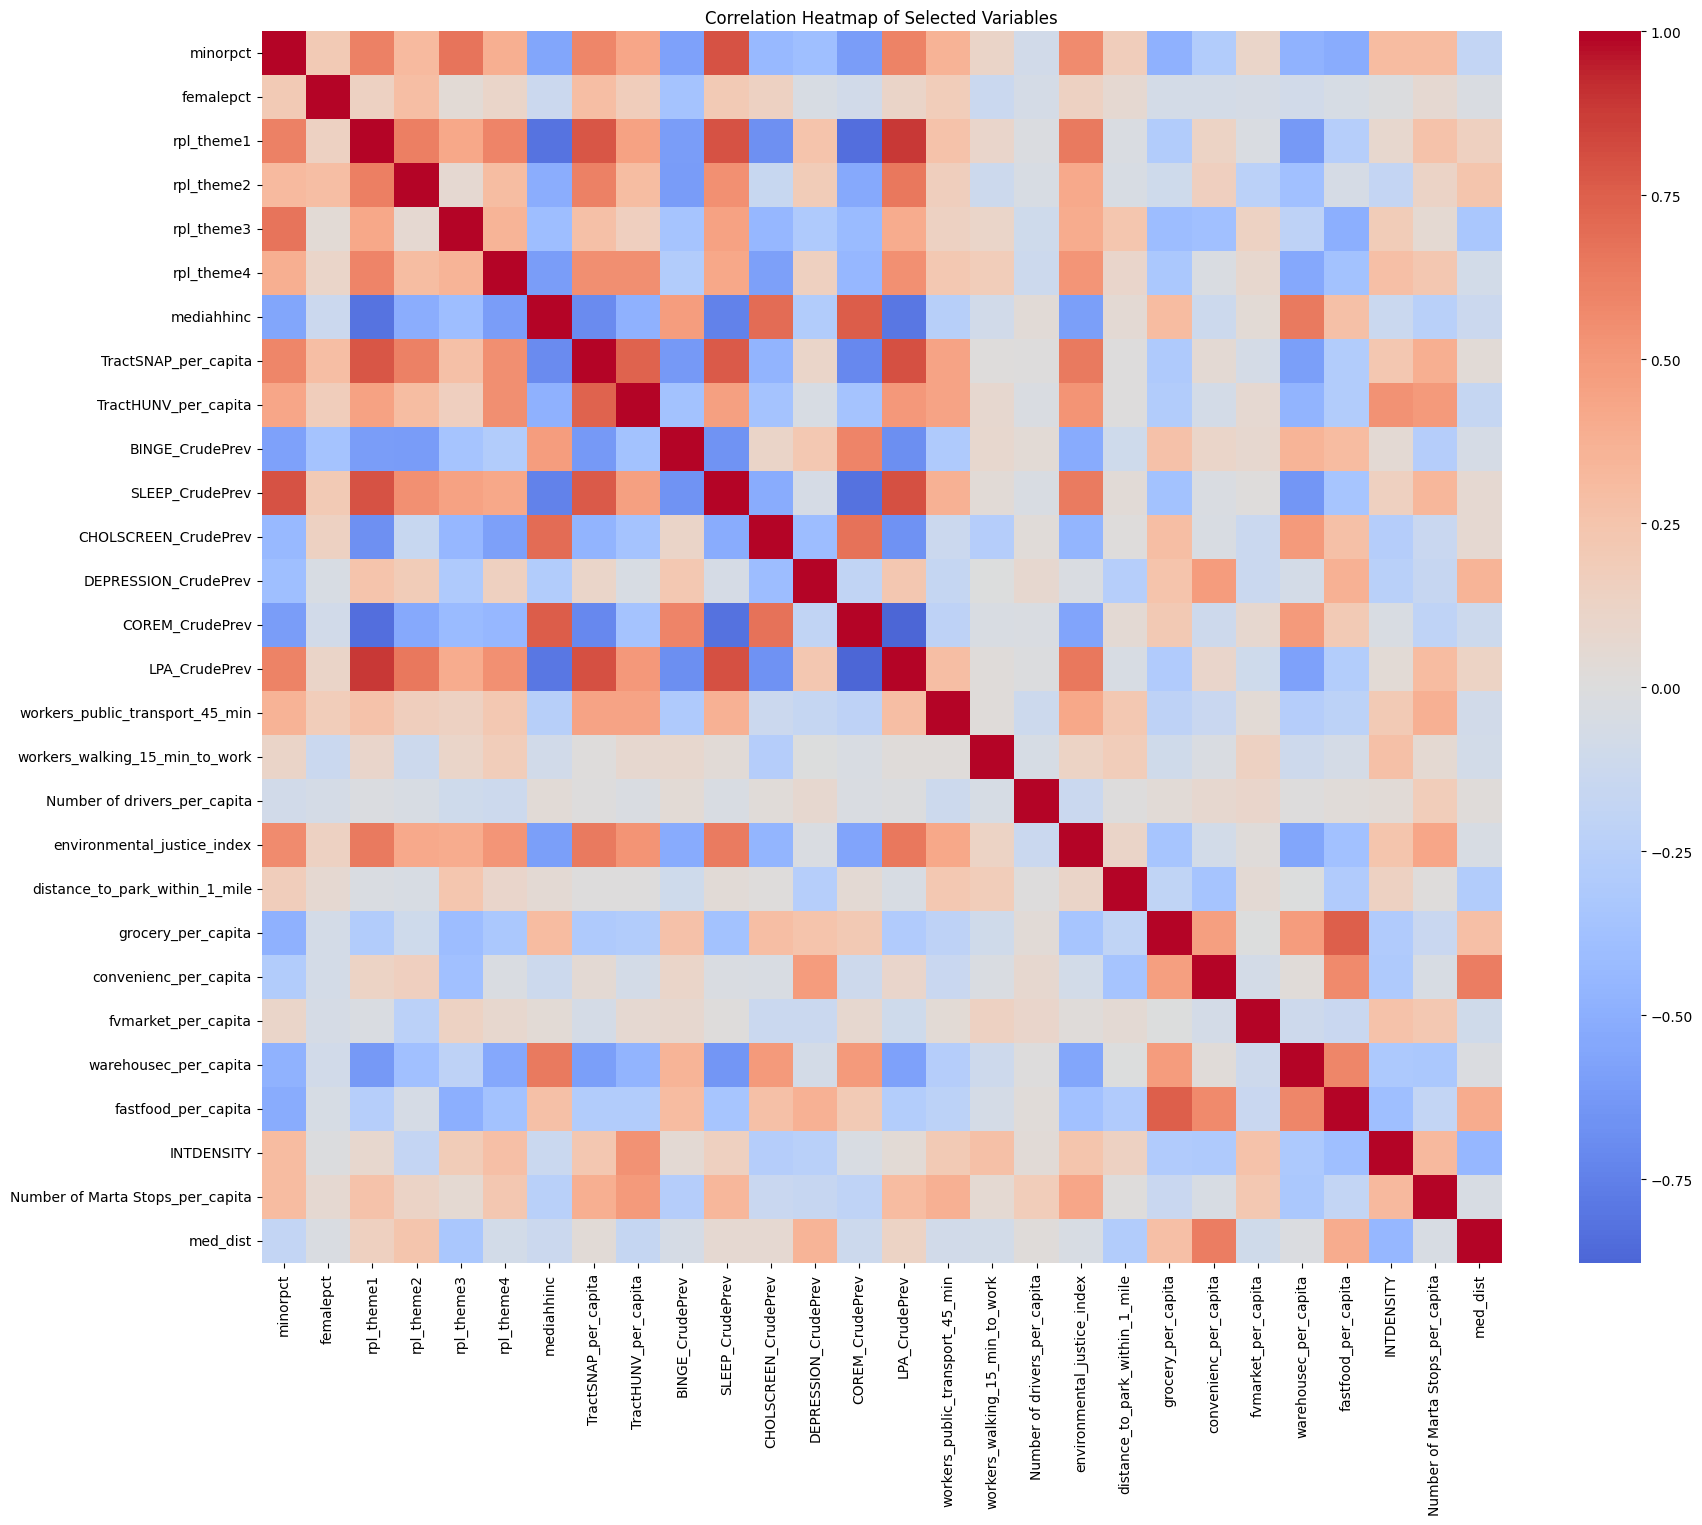

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine all variables into a single list for correlation analysis
all_variables = sociodemographic_variables + human_behavior_variables + environment_variables

# Subset the data to include only the selected variables
data_subset = data[all_variables]

# Ensure that column names are unique
data_subset.columns = pd.Series(data_subset.columns).apply(lambda x: x + "_" + str(pd.Series(data_subset.columns).tolist().count(x)) if pd.Series(data_subset.columns).tolist().count(x) > 1 else x)

# Compute the correlation matrix
correlation_matrix = data_subset.corr()

# Function to get highly correlated pairs
def get_highly_correlated_pairs(corr_matrix, threshold=0.8):
    corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
    high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)].drop_duplicates()
    return high_corr

# Get the highly correlated pairs
high_corr_pairs = get_highly_correlated_pairs(correlation_matrix)

# Adjust Pandas settings to display all rows
pd.set_option('display.max_rows', None)

# Display the highly correlated pairs
print("Highly Correlated Variable Pairs:")
print(high_corr_pairs)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()



Running TPOT for all variables
                                                                             
Generation 1 - Current best internal CV score: -1.9344026493040034
                                                                              
Generation 2 - Current best internal CV score: -1.9344026493040034
                                                                              
Generation 3 - Current best internal CV score: -1.9344026493040034
                                                                              
Generation 4 - Current best internal CV score: -1.8331619900565197
                                                                              
Generation 5 - Current best internal CV score: -1.6724596374921454
                                                                              
Best pipeline: XGBRegressor(RidgeCV(input_matrix), learning_rate=0.1, max_depth=5, min_child_weight=13, n_estimators=100, n_jobs=1, objective=reg:squarederror, 

C:\Users\pengfei lou\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\pengfei lou\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(



Test Set Performance:
MAE: 0.8963129607998597
MSE: 1.4048722837893952
RMSE: 1.1852730840567482
R^2: 0.9561236119935616

Plotting Predicted vs Actual for all variables


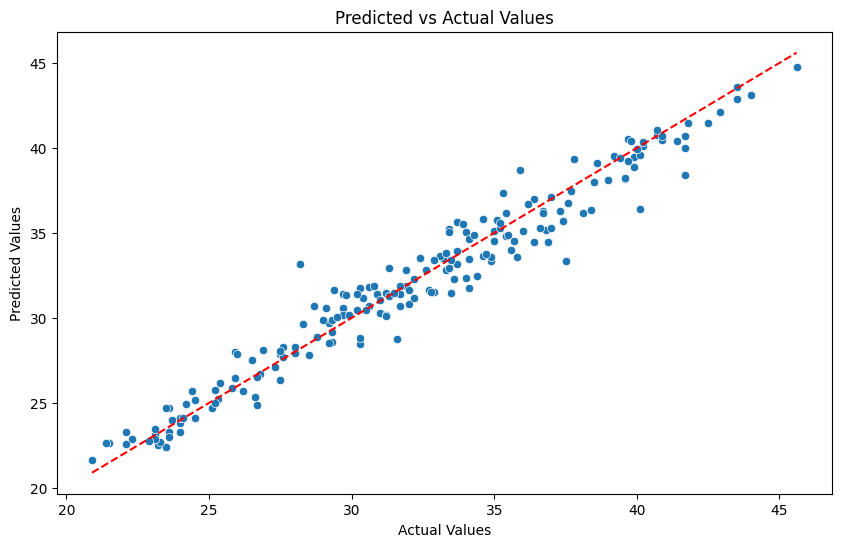

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure data is numeric
def ensure_numeric(X):
    for col in X.columns:
        if X[col].dtype == 'bool':
            X[col] = X[col].astype(int)
        else:
            X[col] = pd.to_numeric(X[col], errors='coerce')
    return X

# Combine all variables into a single list
all_variables = (
    sociodemographic_variables +
    human_behavior_variables +
    environment_variables
)

# Splitting the data for all categories combined
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(data[all_variables], data[target], test_size=0.2, random_state=0)

# Ensure all data is numeric
X_train_all = ensure_numeric(X_train_all)
X_test_all = ensure_numeric(X_test_all)

# Function to run TPOT and evaluate
def run_tpot(X_train, y_train, X_test, y_test, generations=5, population_size=50):
    tpot = TPOTRegressor(generations=generations, population_size=population_size, verbosity=2, n_jobs=-1, random_state=0)
    tpot.fit(X_train, y_train)
    y_pred_train = tpot.predict(X_train)
    y_pred_test = tpot.predict(X_test)
    
    # Evaluation metrics on test set
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f'\nTest Set Performance:')
    print(f'MAE: {mae_test}')
    print(f'MSE: {mse_test}')
    print(f'RMSE: {rmse_test}')
    print(f'R^2: {r2_test}')
    
    specific_file_path = "D:\\project-Geo\\tpot_best_pipeline_all.py"
    tpot.export(specific_file_path)
    
    return tpot, y_pred_test

# Function to plot predicted vs actual values
def plot_predicted_vs_actual(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title('Predicted vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Run TPOT, evaluate on test set, and plot results for all variables
print("\nRunning TPOT for all variables")
tpot_model_all, y_pred_test_all = run_tpot(X_train_all, y_train_all, X_test_all, y_test_all)

print("\nPlotting Predicted vs Actual for all variables")
plot_predicted_vs_actual(y_test_all, y_pred_test_all)


Model Outputs

SHAP Plots

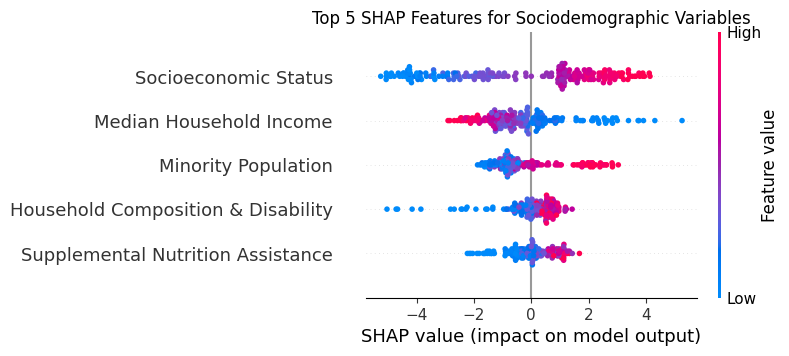

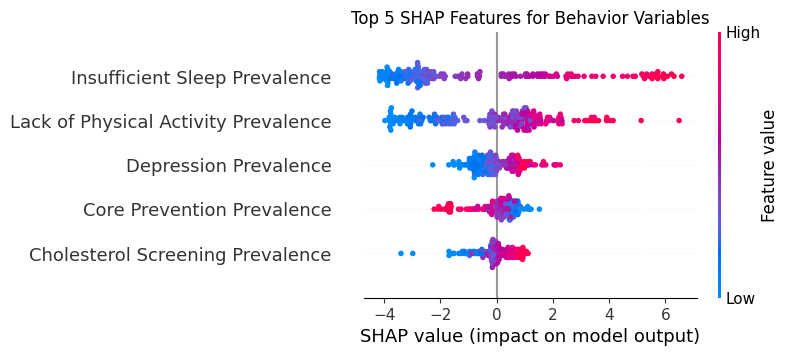

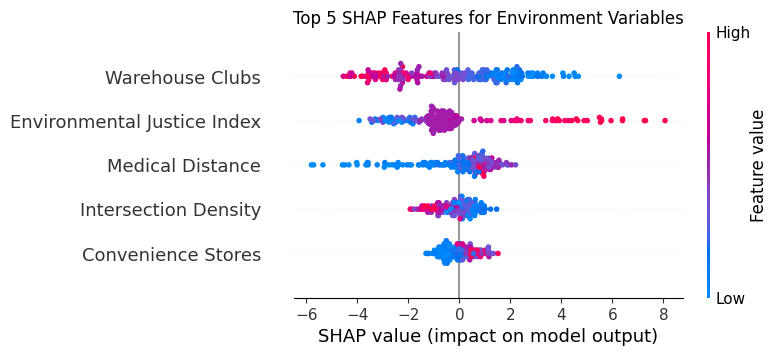

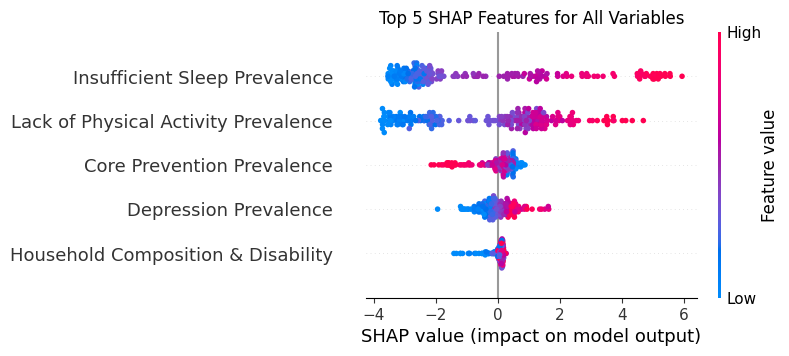

In [34]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import shap
import xgboost as xgb
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import MaxAbsScaler, Normalizer

# Load the data
data = pd.read_csv("D:\\project-Geo\\data\\Database_zero.csv")

sociodemographic_variables = {
    'femalepct': 'Female Population',
    'TractHUNV': 'Tract HUNV',
    'mediahhinc': 'Median Household Income',
    'TractSNAP': 'Supplemental Nutrition Assistance',
    'rpl_theme1': 'Socioeconomic Status',
    'rpl_theme2': 'Household Composition & Disability',
    'rpl_theme3': 'Minority Status & Language',
    'rpl_theme4': 'Housing Type & Transportation',
    'minorpct':'Minority Population'
    
}

human_behavior_variables = {
    'BINGE_CrudePrev': 'Binge Drinking Prevalence',
    'COREM_CrudePrev': 'Core Prevention Prevalence',
    'workers_public_transport_45_min': 'Workers Using Public Transport 45+ min',
    'workers_walking_15_min_to_work': 'Workers Walking 15+ min to Work',
    'Number of drivers_per_capita': 'Number of Drivers per Capita',
    'LPA_CrudePrev': 'Lack of Physical Activity Prevalence',
    'SLEEP_CrudePrev': 'Insufficient Sleep Prevalence',
    'CHOLSCREEN_CrudePrev': 'Cholesterol Screening Prevalence',
    'DEPRESSION_CrudePrev': 'Depression Prevalence'
}

environment_variables = {
    'grocery_per_capita': 'Grocery Stores',
    'convenienc_per_capita': 'Convenience Stores',
    'fvmarket_per_capita': 'Farmers Markets',
    'warehousec_per_capita': 'Warehouse Clubs',
    'fastfood_per_capita': 'Fast Food Restaurants',
    'med_dist': 'Medical Distance',
    'INTDENSITY': 'Intersection Density',
    'Number of Marta Stops': 'Number of Marta Stops',
    'distance_to_park_within_1_mile': 'Distance to Park (within 1 mile)',
    'environmental_justice_index': 'Environmental Justice Index',
}




# Combine all variables with human-readable names
all_variables = {
    **sociodemographic_variables,
    **human_behavior_variables,
    **environment_variables,
}



target = 'obesity_cr'

# Function to ensure data is numeric
def ensure_numeric(X):
    for col in X.columns:
        if X[col].dtype == 'bool':
            X[col] = X[col].astype(int)
        else:
            X[col] = pd.to_numeric(X[col], errors='coerce')
    return X

# Function to calculate SHAP values and plot top features
def plot_top_shap_features(model, X_test, feature_names, category, top_n=5):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    
    mean_abs_shap_values = np.abs(shap_values).mean(axis=0)
    top_features = np.argsort(mean_abs_shap_values)[-top_n:]
    
    shap.summary_plot(shap_values[:, top_features], features=X_test.iloc[:, top_features], feature_names=feature_names[top_features], show=False)
    plt.title(f'Top {top_n} SHAP Features for {category} Variables')
    plt.show()

# Train model and plot SHAP values for each category
variable_groups = [
    (sociodemographic_variables, "Sociodemographic", XGBRegressor(learning_rate=0.1, max_depth=8, min_child_weight=8, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.6500000000000001, verbosity=0)),
    (human_behavior_variables, "Behavior", XGBRegressor(learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.5, verbosity=0)),
    (environment_variables, "Environment", XGBRegressor(learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.55, verbosity=0)),
    (all_variables, "All", XGBRegressor(learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.6500000000000001, verbosity=0))
]

for variables, category, model in variable_groups:
    variable_names = list(variables.keys())
    X_train, X_test, y_train, y_test = train_test_split(data[variable_names], data[target], test_size=0.2, random_state=0)
    X_train = ensure_numeric(X_train)
    X_test = ensure_numeric(X_test)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Plot top SHAP features
    plot_top_shap_features(model, X_test, np.array(list(variables.values())), category)


Dependence Plots

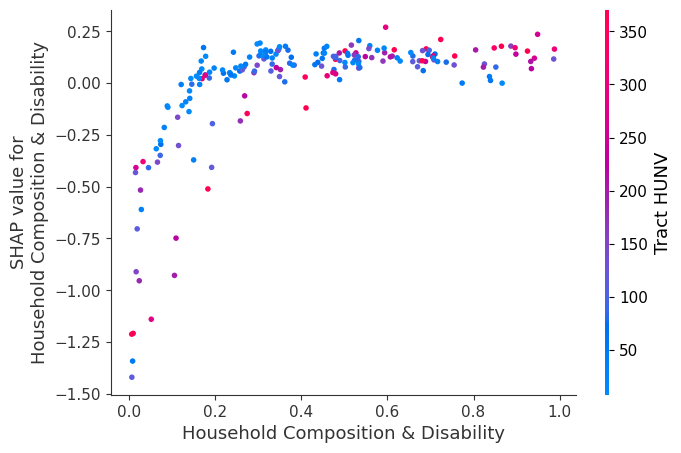

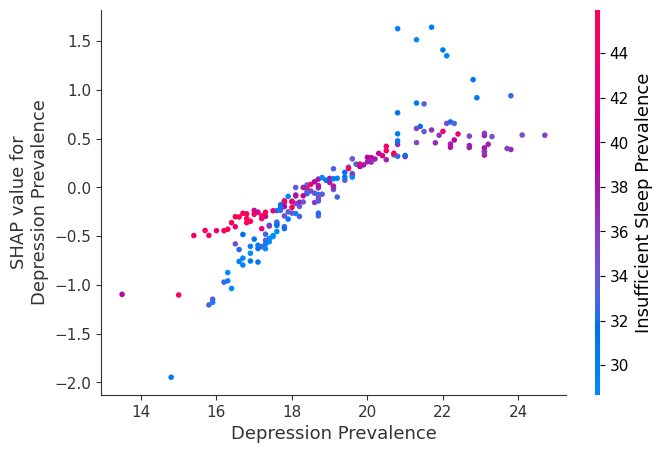

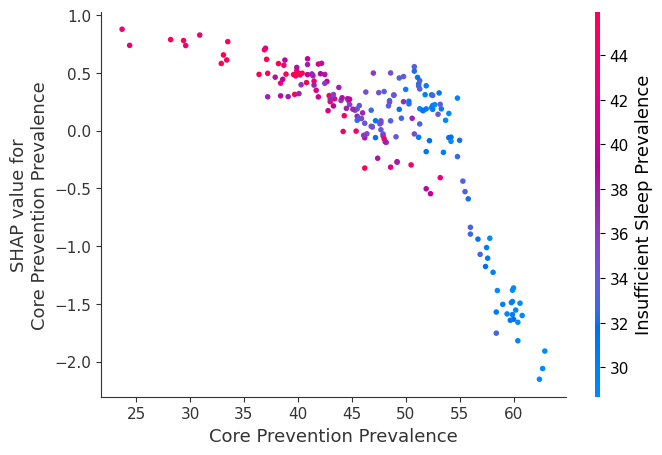

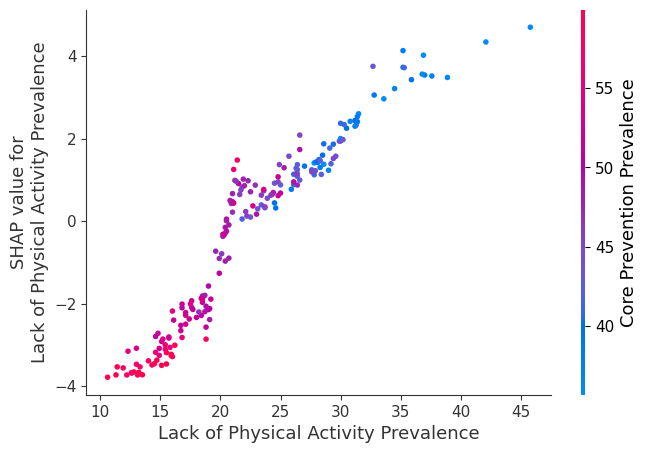

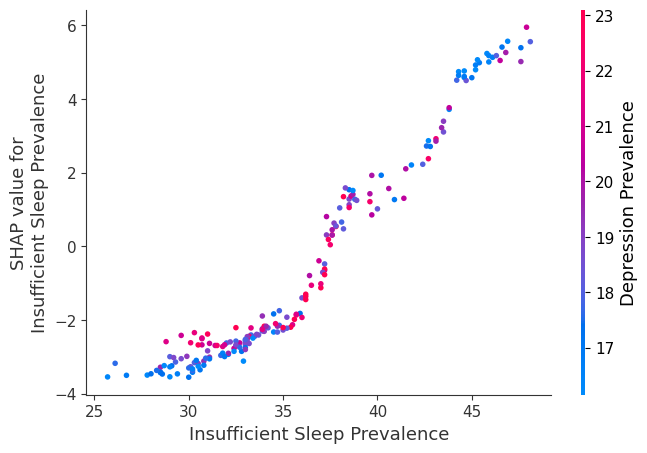

In [35]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


# Function to ensure data is numeric
def ensure_numeric(X):
    for col in X.columns:
        if X[col].dtype == 'bool':
            X[col] = X[col].astype(int)
        else:
            X[col] = pd.to_numeric(X[col], errors='coerce')
    return X


# Function to plot SHAP dependence plots
def plot_shap_dependence(shap_values, X_test, top_features, feature_names):
    for feature in top_features:
        shap.dependence_plot(feature, shap_values, X_test, feature_names=feature_names)
        plt.show()

# Train model and plot SHAP values for "All" variables
all_variable_names = list(all_variables.keys())
all_variable_labels = list(all_variables.values())

X_train, X_test, y_train, y_test = train_test_split(data[all_variable_names], data[target], test_size=0.2, random_state=0)
X_train = ensure_numeric(X_train)
X_test = ensure_numeric(X_test)

model = XGBRegressor(learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.6500000000000001, verbosity=0)
model.fit(X_train, y_train)

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Calculate top features
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)
top_features = np.argsort(mean_abs_shap_values)[-5:]

# Plot SHAP dependence plots for top features
plot_shap_dependence(shap_values, X_test, top_features, np.array(all_variable_labels))


In [36]:
import pandas as pd
from sklearn.metrics import r2_score
from xgboost import XGBRegressor


data = pd.read_csv("D:\\project-Geo\\data\\Database_zero.csv")
# Ensure all necessary columns are present
# Replace with your actual predictor column names as a list

top_5_variables={'Self-care Difficulty Prevalence','Insufficient Sleep Prevalence',
                 'Current Smoking Prevalence','Black Population','Core M Prevalence'}
if isinstance(all_variables, dict):
    predictors = list(all_variables.keys())  # Extract keys if all_variables is a dictionary
else:
    predictors = all_variables  # Assuming all_variables is already a list

target = 'obesity_cr'  # Replace with your actual target variable
county_column = 'CountyName_x'  # Replace if your column name is different

# Ensure predictors and target are present in the data
missing_cols = [col for col in predictors + [target, county_column] if col not in data.columns]
if missing_cols:
    raise ValueError(f"Missing columns in the dataset: {missing_cols}")

# Group data by County
counties = data[county_column].unique()

# Prepare a dictionary to store results
r2_results = {}

# Loop through each county and calculate R^2
for county in counties:
    # Subset the data for the current county
    county_data = data[data[county_column] == county]
    
    # Ensure there are enough data points for regression
    #if len(county_data) < len(predictors) + 1:
        #print(f"Skipping {county} due to insufficient data points")
        #continue
    
    # Extract predictors and target for the county
    X = county_data[predictors]
    y = county_data[target]
    
    # Handle missing values (if any)
    X = X.fillna(0)
    y = y.fillna(0)
    
    # Fit the model for the current county
    model = XGBRegressor(
        learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100,
        n_jobs=1, objective="reg:squarederror", subsample=0.65, verbosity=0
    )
    model.fit(X, y)
    
    # Predict and calculate R^2 for the current county
    y_pred = model.predict(X)
    r2 = round(r2_score(y, y_pred),3)
    
    # Store results
    r2_results[county] = r2

# Convert results to a DataFrame
r2_df = pd.DataFrame(list(r2_results.items()), columns=['County', 'R^2'])

# Save results to a CSV file
r2_df.to_csv("D:\\project-Geo\\county_r2_results.csv", index=False)

# Display the results
print("R^2 values by county:")
print(r2_df)


R^2 values by county:
        County    R^2
0       Fulton  0.999
1         Hall  0.980
2     Haralson -0.000
3       Jasper -0.000
4         Pike -0.000
5       DeKalb  0.995
6         Cobb  0.997
7      Clayton  0.963
8      Pickens -0.000
9     Gwinnett  0.995
10    Rockdale  0.616
11       Henry  0.965
12     Douglas  0.861
13    Cherokee  0.944
14      Newton -0.000
15      Walton  0.358
16    Paulding  0.864
17     Forsyth  0.972
18     Fayette  0.910
19       Butts -0.000
20    Spalding -0.000
21      Coweta  0.773
22      Barrow  0.706
23     Carroll  0.482
24      Bartow  0.498
25      Dawson -0.000
26       Heard -0.000
27       Lamar -0.000
28  Meriwether  0.000


C:\Users\pengfei lou\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


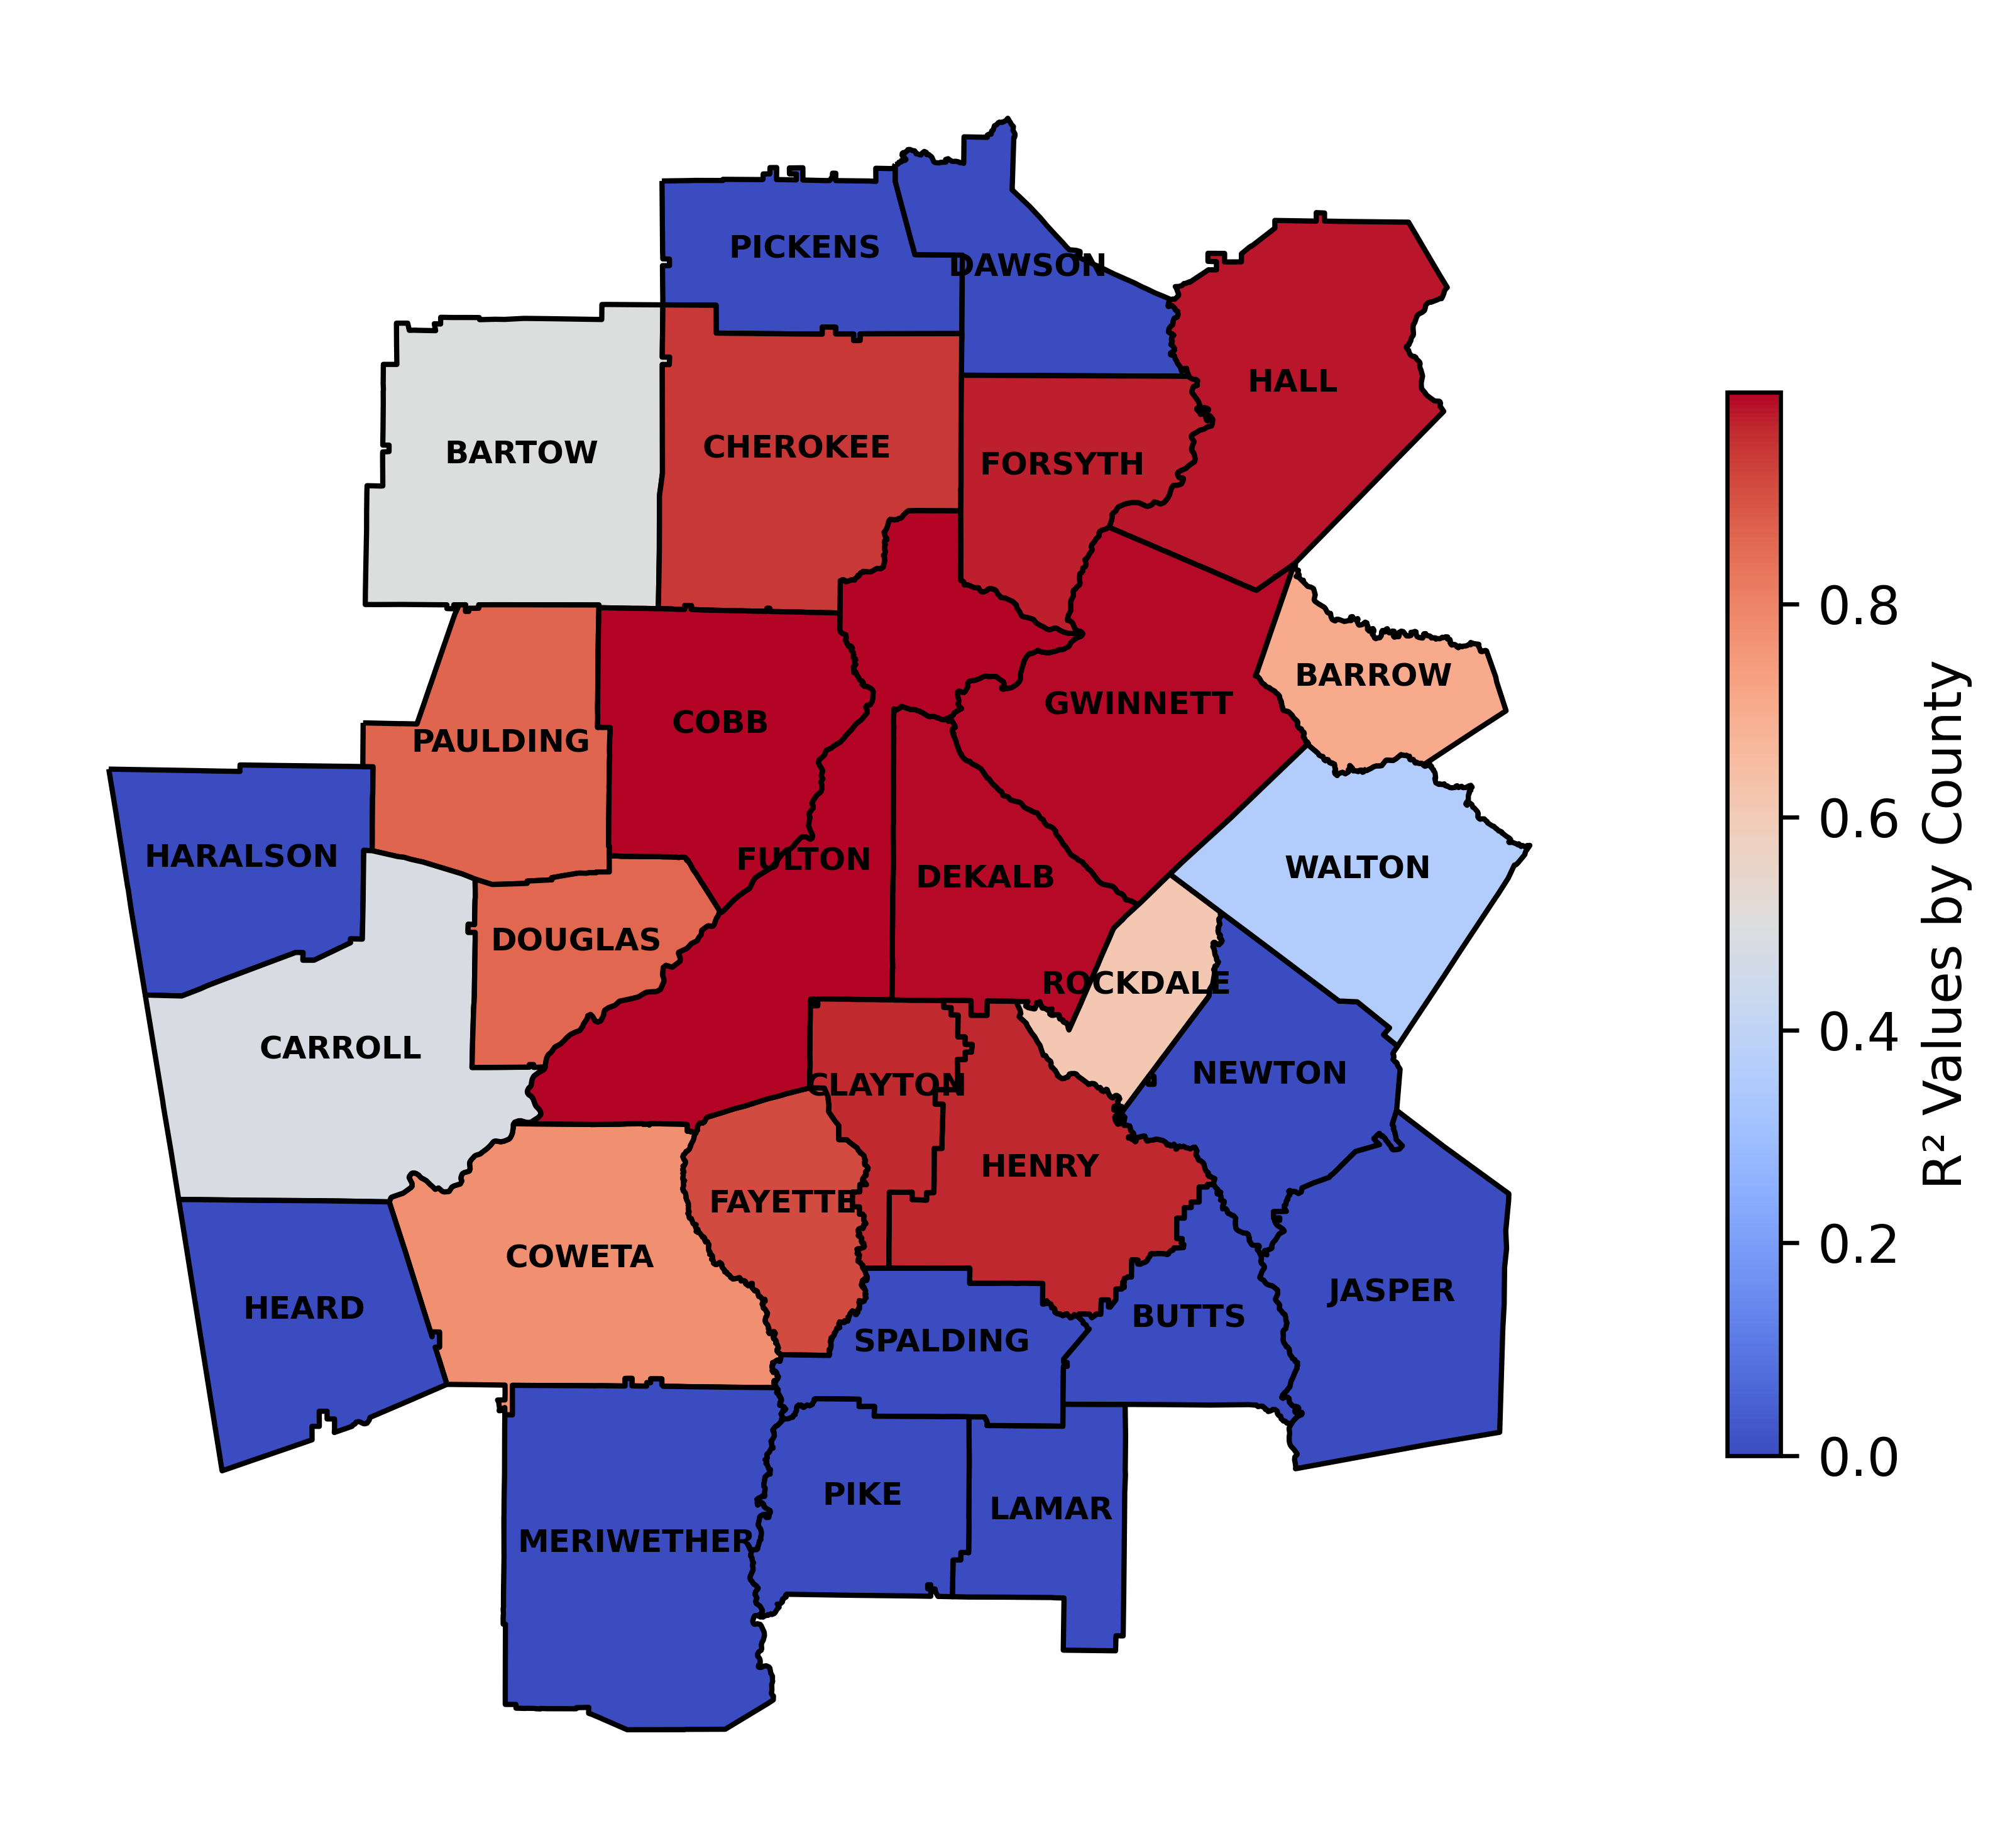

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the US counties shapefile
counties = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_500k.zip")

# Filter for Georgia state (FIPS code 13)
georgia_counties = counties[counties['STATEFP'] == '13']

# Standardize county names to uppercase for matching
r2_df['County'] = r2_df['County'].str.upper()
georgia_counties['NAME'] = georgia_counties['NAME'].str.upper()

# Filter only the counties with R² data
filtered_counties = georgia_counties[georgia_counties['NAME'].isin(r2_df['County'])]

# Merge the filtered counties with R² data
merged_gdf = filtered_counties.merge(r2_df, left_on='NAME', right_on='County', how='left')

fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=600)  # High resolution and ideal size
merged_gdf.boundary.plot(ax=ax, color='black', linewidth=0.8)
merged_gdf.plot(column='R^2', ax=ax, legend=True, cmap='coolwarm', edgecolor='black',
                legend_kwds={'label': "R² Values by County", 'shrink': 0.6})

# Clear, bold labels
for idx, row in merged_gdf.iterrows():
    plt.annotate(text=row['NAME'],
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', fontsize=6, color='black', weight='bold')

#plt.title("R² Values by Selected Counties in Georgia", fontsize=12, weight='bold')
plt.axis('off')
plt.tight_layout()

# Save as high-resolution PNG or PDF for publication
plt.savefig("R2_Map_Publication.png", dpi=600, bbox_inches='tight', format='png')
#plt.savefig("R2_Map_Publication.pdf", bbox_inches='tight', format='pdf')  # For vector quality

plt.show()
